In [4]:
## Load in required libraries 
from Bio import SeqIO 
import numpy as np
import glob
import pandas as pd
import pickle as pk
import matplotlib.pylab as plt
import seaborn as sns
import os.path
import math

In [5]:
from os.path import join

In [6]:
## Define paths & variables
species_list=['s__Acinetobacter_johnsonii.fna'
,'s__Akkermansia_muciniphila.fna'
,'s__Alistipes_shahii.fna'
,'s__Bacillaceae_bacterium_EAG3.fna'
,'s__Bacteroides_dorei.fna'
,'s__Bacteroides_fragilis.fna'
,'s__Bacteroides_thetaiotaomicron.fna'
,'s__Bacteroides_uniformis.fna'
,'s__Bacteroides_vulgatus.fna'
,'s__Clostridium_perfringens.fna'
,'s__Clostridium_ventriculi.fna'
,'s__Collinsella_massiliensis.fna'
,'s__Collinsella_stercoris.fna'
,'s__Enterococcus_faecalis.fna'
,'s__Erysipelatoclostridium_ramosum.fna'
,'s__Escherichia_coli.fna'
,'s__Lactobacillus_apodemi.fna'
,'s__Lactobacillus_murinus.fna'
,'s__Lactobacillus_reuteri.fna'
,'s__Lactobacillus_rodentium.fna'
,'s__Parabacteroides_distasonis.fna'
,'s__Plesiomonas_shigelloides.fna'
,'s__Prevotella_copri.fna'
,'s__Pseudomonas_lundensis.fna'
,'s__Pseudomonas_yamanorum.fna'
,'s__Ruthenibacterium_lactatiformans.fna'
,'s__Streptococcus_gallolyticus.fna']
clade_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/db_markers"
output_fig_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/figures/"
path_to_file="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/merged_abundance_table_species.txt"
path_to_metadata="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/metadata/vert_metadata_new.txt"

# Examine abundance table 

In [8]:
df_bacteria_abundance=pd.read_csv(path_to_file,sep="\t",index_col=0)

In [9]:
df_bacteria_abundance.head()

,Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D712-AK1546_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D712-AK1544_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D709-AK1682_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D709-AK1681_filtered_r1r2combined_profile,Artibeus-intermedius_S_S_Temp_D709-AK1780_filtered_r1r2combined_profile,Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2combined_sampleCombined_profile,Zamenis-longissimus_SAMEA6809441.ebi_filtered_r1r2combined_sampleCombined_profile,Vulpes-vulpes_SAMEA6809599.ebi_filtered_r1r2combined_sampleCombined_profile,Vulpes-vulpes_SAMEA6809362.ebi_filtered_r1r2combined_sampleCombined_profile,...,Callosciurus-prevostii_S_S_Temp_D704-AK1680_filtered_r1r2combined_profile,Callosciurus-prevostii_S_S_Temp_D704-AK1543_filtered_r1r2combined_profile,Buteo-jamaicensis_S_S_Temp_D707-AK1680_filtered_r1r2combined_profile,Balantiopteryx-plicata_S_S_Temp_D708-AK1545_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1682_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1681_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1546_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D705-AK1546_filtered_r1r2combined_profile,Aptenodytes-patagonicus_S_S_Temp_D711-AK1545_filtered_r1r2combined_profile,Aptenodytes-patagonicus_S_S_Temp_D710-AK1680_filtered_r1r2combined_profile
host_samples,,,,,,,,,,,,,,,,,,,,,
Methanobrevibacter_arboriphilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_gottschalkii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_millerae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_smithii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_sp_AbM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## Check sum across column ==> should be 100% as sum of all normalized abundance in a sample should be 100% 
## Figured out that there are a ton of samples without any detectable strain! Markers are still geared towards humans? 
samples_bac_sum=df_bacteria_abundance.sum(axis=0)
samples_bac_sum.value_counts()

100.00000    291
0.00000       92
99.99999      66
100.00001     62
100.00000     27
100.00000     21
100.00001     19
100.00002     16
99.99999      13
99.99998      12
99.99999       7
99.99997       5
99.99996       4
99.99998       4
100.00002      3
100.00001      3
99.99998       2
100.00003      2
100.00003      2
100.00002      2
100.00004      2
99.99995       1
100.00000      1
100.00004      1
100.00004      1
99.99998       1
99.99999       1
100.00005      1
dtype: int64

In [9]:
## Identify the samples without any detectable bacteria
df_samples_undetected_bac=df_bacteria_abundance.loc[:,(df_bacteria_abundance==0).all()]
type(df_samples_undetected_bac.columns.values)
# df_samples_undetected_bac.columns.values

numpy.ndarray

# Visualize the missing samples in terms of read per sample & filtered read per sample plus the percent of missing sample aross host class

In [10]:
## Df_metadata
df_metadata_orig=pd.read_csv(path_to_metadata,sep="\t", encoding='windows-1252',index_col="SampleID")
df_metadata_orig.head()

,sample_name,studyID,file_filtered_r1r2_combined,reads_per_unfiltered_file,reads_per_file,species_id,host_phylum,host_class,host_family,host_genus,...,reference_host_for_filtering,host_modality,host_diet,country,habitat,sample_type,diet_category_12,diet_category_3,captive_wild,Unnamed: 27
SampleID,,,,,,,,,,,,,,,,,,,,,
Artibeus-intermedius_S_S_Temp_D709-AK1780_filtered_r1r2combined,2338.0623.7.I,2338,Artibeus-intermedius_S_S_Temp_D709-AK1780_filt...,10812150,10809968,great_fruit-eating_bat.1,Chordata,Mammalia,Phyllostomidae,Artibeus,...,Artibeus jamaicensis,NaN,NaN,Costa Rica,NaN,NaN,frugivore,herbivore,wild,NaN
Carollia-perspicillata_S_S_Temp_D709-AK1682_filtered_r1r2combined,2338.0620.8.I,2338,Carollia-perspicillata_S_S_Temp_D709-AK1682_fi...,28375062,28354050,sebas_short-tailed_bat.1,Chordata,Mammalia,Phyllostomidae,Carollia,...,Carollia perspicillata,NaN,NaN,Costa Rica,NaN,NaN,frugivore,herbivore,wild,NaN
Carollia-perspicillata_S_S_Temp_D712-AK1544_filtered_r1r2combined,2338.0623.9.I,2338,Carollia-perspicillata_S_S_Temp_D712-AK1544_fi...,122751186,122713288,sebas_short-tailed_bat.2,Chordata,Mammalia,Phyllostomidae,Carollia,...,Carollia perspicillata,NaN,NaN,Costa Rica,NaN,NaN,frugivore,herbivore,wild,NaN
Carollia-perspicillata_S_S_Temp_D712-AK1546_filtered_r1r2combined,2338.0627.22.I2,2338,Carollia-perspicillata_S_S_Temp_D712-AK1546_fi...,8559788,8556874,sebas_short-tailed_bat.3,Chordata,Mammalia,Phyllostomidae,Carollia,...,Carollia perspicillata,NaN,NaN,Costa Rica,NaN,NaN,frugivore,herbivore,wild,NaN
Carollia-perspicillata_S_S_Temp_D709-AK1681_filtered_r1r2combined,2338.0701.17.I,2338,Carollia-perspicillata_S_S_Temp_D709-AK1681_fi...,488426,487862,sebas_short-tailed_bat.4,Chordata,Mammalia,Phyllostomidae,Carollia,...,Carollia perspicillata,NaN,NaN,Costa Rica,NaN,NaN,frugivore,herbivore,wild,NaN


In [11]:
## Subset the df_metadata
df_metadata=df_metadata_orig[["reads_per_unfiltered_file","reads_per_file","host_class","host_order","species_id","studyID"]]
df_metadata.head()

,reads_per_unfiltered_file,reads_per_file,host_class,host_order,species_id,studyID
SampleID,,,,,,
Artibeus-intermedius_S_S_Temp_D709-AK1780_filtered_r1r2combined,10812150,10809968,Mammalia,Chiroptera,great_fruit-eating_bat.1,2338
Carollia-perspicillata_S_S_Temp_D709-AK1682_filtered_r1r2combined,28375062,28354050,Mammalia,Chiroptera,sebas_short-tailed_bat.1,2338
Carollia-perspicillata_S_S_Temp_D712-AK1544_filtered_r1r2combined,122751186,122713288,Mammalia,Chiroptera,sebas_short-tailed_bat.2,2338
Carollia-perspicillata_S_S_Temp_D712-AK1546_filtered_r1r2combined,8559788,8556874,Mammalia,Chiroptera,sebas_short-tailed_bat.3,2338
Carollia-perspicillata_S_S_Temp_D709-AK1681_filtered_r1r2combined,488426,487862,Mammalia,Chiroptera,sebas_short-tailed_bat.4,2338


In [12]:
## Create extra column i'm interested in about the reads
df_metadata['filtered_reads_per_file']= df_metadata["reads_per_unfiltered_file"] - df_metadata["reads_per_file"]
df_metadata["log10(filtered_reads)"]=np.log10(df_metadata.loc[:,"filtered_reads_per_file"])
df_metadata["log10(reads_per_file)"]=np.log10(df_metadata.loc[:,"reads_per_file"])
df_metadata["log10(reads_per_unfiltered_file)"]=np.log10(df_metadata.loc[:,"reads_per_unfiltered_file"])

df_metadata["MetaPhlAn3 bacteria profiling"]="Known bacteria profiled"


/home/jhc103/miniconda3/envs/jupyter-general/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jhc103/miniconda3/envs/jupyter-general/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jhc103/miniconda3/envs/jupyter-general/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to

In [13]:
## Insert no known bacteria profiled 
for indexV in df_metadata.index:
    indexVmod=indexV+"_profile"
    if indexVmod in df_samples_undetected_bac.columns.values:
        df_metadata.loc[indexV,"MetaPhlAn3 bacteria profiling"] = "No known bacteria profiled"
df_metadata.head()

/home/jhc103/miniconda3/envs/jupyter-general/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,reads_per_unfiltered_file,reads_per_file,host_class,host_order,species_id,studyID,filtered_reads_per_file,log10(filtered_reads),log10(reads_per_file),log10(reads_per_unfiltered_file),MetaPhlAn3 bacteria profiling
SampleID,,,,,,,,,,,
Artibeus-intermedius_S_S_Temp_D709-AK1780_filtered_r1r2combined,10812150,10809968,Mammalia,Chiroptera,great_fruit-eating_bat.1,2338,2182,3.338855,7.033824,7.033912,Known bacteria profiled
Carollia-perspicillata_S_S_Temp_D709-AK1682_filtered_r1r2combined,28375062,28354050,Mammalia,Chiroptera,sebas_short-tailed_bat.1,2338,21012,4.322467,7.452615,7.452937,Known bacteria profiled
Carollia-perspicillata_S_S_Temp_D712-AK1544_filtered_r1r2combined,122751186,122713288,Mammalia,Chiroptera,sebas_short-tailed_bat.2,2338,37898,4.578616,8.088892,8.089026,Known bacteria profiled
Carollia-perspicillata_S_S_Temp_D712-AK1546_filtered_r1r2combined,8559788,8556874,Mammalia,Chiroptera,sebas_short-tailed_bat.3,2338,2914,3.464490,6.932315,6.932463,Known bacteria profiled
Carollia-perspicillata_S_S_Temp_D709-AK1681_filtered_r1r2combined,488426,487862,Mammalia,Chiroptera,sebas_short-tailed_bat.4,2338,564,2.751279,5.688297,5.688799,Known bacteria profiled


In [18]:
taxonomy_level = "studyID"
# df_undetected_bacteria=df_metadata.loc[df_metadata["MetaPhlAn3 bacteria profiling"]=="No known bacteria profiled",]
index_list=list(df_metadata[taxonomy_level].value_counts().index)
col1_list=list(df_metadata[taxonomy_level].value_counts())
data = {
#     'index':index_list,
    'total_available':col1_list,
    "unprofiled":[0]
}
df_temp=pd.DataFrame(data, index=index_list)
df_unprofiled=df_metadata.loc[df_metadata["MetaPhlAn3 bacteria profiling"]=="No known bacteria profiled",taxonomy_level].value_counts()
for value in df_unprofiled.iteritems():
    df_temp.loc[value[0],'unprofiled']=value[1]
    
df_temp["percent_unprofiled (%)"]= round(df_temp["unprofiled"]/df_temp["total_available"]*100,1)
df_temp_non_zero = df_temp.loc[df_temp["percent_unprofiled (%)"] != 0.0,].sort_values(by='percent_unprofiled (%)',ascending=False)
df_temp_non_zero

,total_available,unprofiled,percent_unprofiled (%)
11212,95,16,16.8
13881,289,48,16.6
13114,182,28,15.4


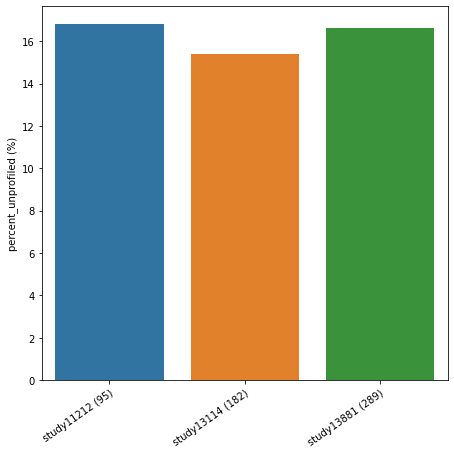

In [22]:
fig, p0 = plt.subplots(1, 1, figsize=(6.2,6.2), constrained_layout=True)

sns.barplot(x=df_temp_non_zero.index, y="percent_unprofiled (%)", data=df_temp_non_zero)
adjusted_labels = [ "study"+ value.get_text() + " ("+ str(df_temp_non_zero.loc[int(value.get_text()),"total_available"])+")" for value in p0.get_xticklabels()]
p0.set_xticklabels(adjusted_labels,rotation=35,horizontalalignment="right", rotation_mode='anchor')

plt.savefig(output_fig_dir+"bar_plot_percent_of_unprofiled_samples_across_"+taxonomy_level+".png",dpi=900, bbox_inches="tight")

In [12]:
## Plot log of reads_per_file
## Sort by log of reads per file
df_sort_read=df_metadata.sort_values(by='log10(reads_per_file)', ascending=False).copy()
df_sort_unfiltered_read=df_metadata.sort_values(by='log10(reads_per_unfiltered_file)', ascending=False).copy()
df_sort_filtered_out_read=df_metadata.sort_values(by='log10(filtered_reads)', ascending=False).copy()


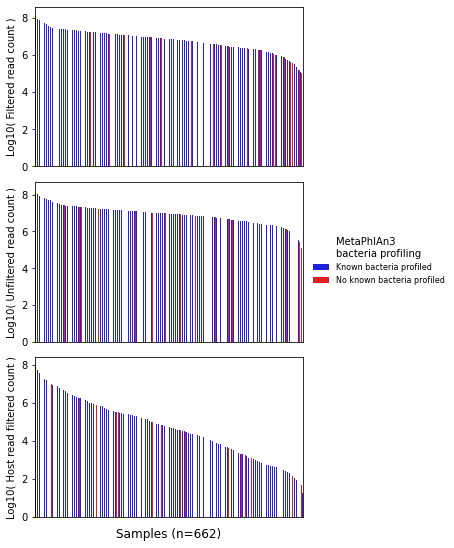

In [12]:
# Creat figure with 3 subplots 
fig, (p0, p01, p02) = plt.subplots(3, 1, figsize=(6.2,7.5),constrained_layout=True)
## Plot 
p0=sns.barplot(x=df_sort_read.index, y=df_sort_read["log10(reads_per_file)"],hue=df_sort_read['MetaPhlAn3 bacteria profiling'], palette={'Known bacteria profiled':'b', 'No known bacteria profiled': 'r'}, ax=p0)
p0.set_ylabel("Log10( Filtered read count )") # \n (Assuming equal similar sample across all samples)
p0.tick_params(bottom = False)
p0.xaxis.label.set_visible(False)
p0.set(xticklabels=[])
p0.get_legend().remove()


## Plot 
p01=sns.barplot(x=df_sort_unfiltered_read.index, y=df_sort_unfiltered_read["log10(reads_per_unfiltered_file)"],hue=df_sort_unfiltered_read['MetaPhlAn3 bacteria profiling'], palette={'Known bacteria profiled':'b', 'No known bacteria profiled': 'r'}, ax=p01)
p01.set_ylabel("Log10( Unfiltered read count )") # \n (Assuming equal similar sample across all samples)
p01.tick_params(bottom = False)
p01.xaxis.label.set_visible(False)
p01.set(xticklabels=[])
handles, labels = p01.get_legend_handles_labels()
#p5.legend(handles[0:2],labels[0:2], bbox_to_anchor=(1,1), loc=2, title ="StrainPhlAn3\npipeline\neligibility" )
p01.legend( handles[0:2],labels[0:2], frameon=False, bbox_to_anchor=(1.01,0.7), fontsize=8, loc=2, title='MetaPhlAn3\nbacteria profiling')


## Plot 
p02=sns.barplot(x=df_sort_filtered_out_read.index, y=df_sort_filtered_out_read["log10(filtered_reads)"],hue=df_sort_filtered_out_read['MetaPhlAn3 bacteria profiling'], palette={'Known bacteria profiled':'b', 'No known bacteria profiled': 'r'}, ax=p02)
p02.set_ylabel("Log10( Host read filtered count )") # \n (Assuming equal similar sample across all samples)
p02.tick_params(bottom = False)
p02.set(xticklabels=[])
p02.set_xlabel("Samples (n=662)", fontsize=12)
p02.get_legend().remove()

plt.savefig(output_fig_dir+"bar_plot_read_count_color_metaphlan_profiling.png",dpi=900, bbox_inches="tight")
fig.show()


# Conditionally subset df to exclude samples without bacteria detected

In [13]:
## Subset df depending on if you want to remove samples with 0 bacteria
remove_samples_with_no_bacteria=True

if remove_samples_with_no_bacteria:
    df_bacteria_abundance.drop([col for col, val in df_bacteria_abundance.sum().iteritems() if val == 0], axis=1, inplace=True)
df_bacteria_abundance

,Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D712-AK1546_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D712-AK1544_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D709-AK1682_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D709-AK1681_filtered_r1r2combined_profile,Artibeus-intermedius_S_S_Temp_D709-AK1780_filtered_r1r2combined_profile,Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2combined_sampleCombined_profile,Zamenis-longissimus_SAMEA6809441.ebi_filtered_r1r2combined_sampleCombined_profile,Vulpes-vulpes_SAMEA6809599.ebi_filtered_r1r2combined_sampleCombined_profile,Vulpes-vulpes_SAMEA6809362.ebi_filtered_r1r2combined_sampleCombined_profile,...,Callosciurus-prevostii_S_S_Temp_D704-AK1680_filtered_r1r2combined_profile,Callosciurus-prevostii_S_S_Temp_D704-AK1543_filtered_r1r2combined_profile,Buteo-jamaicensis_S_S_Temp_D707-AK1680_filtered_r1r2combined_profile,Balantiopteryx-plicata_S_S_Temp_D708-AK1545_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1682_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1681_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1546_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D705-AK1546_filtered_r1r2combined_profile,Aptenodytes-patagonicus_S_S_Temp_D711-AK1545_filtered_r1r2combined_profile,Aptenodytes-patagonicus_S_S_Temp_D710-AK1680_filtered_r1r2combined_profile
host_samples,,,,,,,,,,,,,,,,,,,,,
Methanobrevibacter_arboriphilus,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_gottschalkii,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_millerae,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_smithii,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Methanobrevibacter_sp_AbM4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Candida_parapsilosis,0.0,0.0,0.0,0.21598,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saccharomyces_cerevisiae,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blastocystis_sp_subtype_1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualize bacteria abundance

## Calculate the noramlized abundance of bacteria over entire dataset

In [11]:
## Sum the dataframe across each bacteria to find sum of (normalized bacteria abundance per sample) into a series
bacterias_sample_sum=df_bacteria_abundance.sum(axis=1)

## Define simple function to normalize the normalizes bacteria abundance per sample over our entire dataset
sum=bacterias_sample_sum.sum()
def divide_by_sum(x):
    return x/sum*100

series_bac_abundance=bacterias_sample_sum.apply(divide_by_sum)
print(series_bac_abundance)
len(series_bac_abundance)

host_samples
Methanobrevibacter_arboriphilus    0.004032
Methanobrevibacter_gottschalkii    0.001499
Methanobrevibacter_millerae        0.279883
Methanobrevibacter_smithii         0.446128
Methanobrevibacter_sp_AbM4         0.030247
                                     ...   
Candida_parapsilosis               0.000379
Saccharomyces_cerevisiae           0.171113
Blastocystis_sp_subtype_1          0.002105
Giardia_intestinalis               0.000687
Trachipleistophora_hominis         0.000134
Length: 1168, dtype: float64


1168

## Calculate presence-absence of bacteria for each dataset

In [12]:
# Buid new df with present absense data
df_bacteria_abundance_unweighted=df_bacteria_abundance
df_bacteria_abundance_unweighted[df_bacteria_abundance_unweighted != 0] = 1
series_bac_abundance_unweighted=df_bacteria_abundance_unweighted.sum(axis=1)
print(series_bac_abundance_unweighted)
len(series_bac_abundance_unweighted)

host_samples
Methanobrevibacter_arboriphilus     1.0
Methanobrevibacter_gottschalkii     2.0
Methanobrevibacter_millerae         3.0
Methanobrevibacter_smithii         14.0
Methanobrevibacter_sp_AbM4          4.0
                                   ... 
Candida_parapsilosis                1.0
Saccharomyces_cerevisiae            2.0
Blastocystis_sp_subtype_1           4.0
Giardia_intestinalis                1.0
Trachipleistophora_hominis          1.0
Length: 1168, dtype: float64


1168

## Add the series calculated from before in the dataframe 

In [13]:
## Add information about abundances back to dataframe 
df_bacteria_abundance["normalized_abundance_over_dataset"]=series_bac_abundance
df_bacteria_abundance["abundance_by_sample_count"]=series_bac_abundance_unweighted
## then subset df to include top 20 most abundant bacteria 
df_bacteria_abundance

,Carollia-sowelli_S_S_Temp_D712-AK1545_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D712-AK1546_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D712-AK1544_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D709-AK1682_filtered_r1r2combined_profile,Carollia-perspicillata_S_S_Temp_D709-AK1681_filtered_r1r2combined_profile,Artibeus-intermedius_S_S_Temp_D709-AK1780_filtered_r1r2combined_profile,Zingel-zingel_SAMEA6809475.ebi_filtered_r1r2combined_sampleCombined_profile,Zamenis-longissimus_SAMEA6809441.ebi_filtered_r1r2combined_sampleCombined_profile,Vulpes-vulpes_SAMEA6809599.ebi_filtered_r1r2combined_sampleCombined_profile,Vulpes-vulpes_SAMEA6809362.ebi_filtered_r1r2combined_sampleCombined_profile,...,Buteo-jamaicensis_S_S_Temp_D707-AK1680_filtered_r1r2combined_profile,Balantiopteryx-plicata_S_S_Temp_D708-AK1545_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1682_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1681_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D706-AK1546_filtered_r1r2combined_profile,Apteryx-mantelli_S_S_Temp_D705-AK1546_filtered_r1r2combined_profile,Aptenodytes-patagonicus_S_S_Temp_D711-AK1545_filtered_r1r2combined_profile,Aptenodytes-patagonicus_S_S_Temp_D710-AK1680_filtered_r1r2combined_profile,normalized_abundance_over_dataset,abundance_by_sample_count
host_samples,,,,,,,,,,,,,,,,,,,,,
Methanobrevibacter_arboriphilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004032,1.0
Methanobrevibacter_gottschalkii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001499,2.0
Methanobrevibacter_millerae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279883,3.0
Methanobrevibacter_smithii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446128,14.0
Methanobrevibacter_sp_AbM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030247,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Candida_parapsilosis,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000379,1.0
Saccharomyces_cerevisiae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171113,2.0
Blastocystis_sp_subtype_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002105,4.0


## Plot normalized abundance over entire dataset (assuming similar sample across all samples)

Text(0.5, 0, 'Bacterial species')

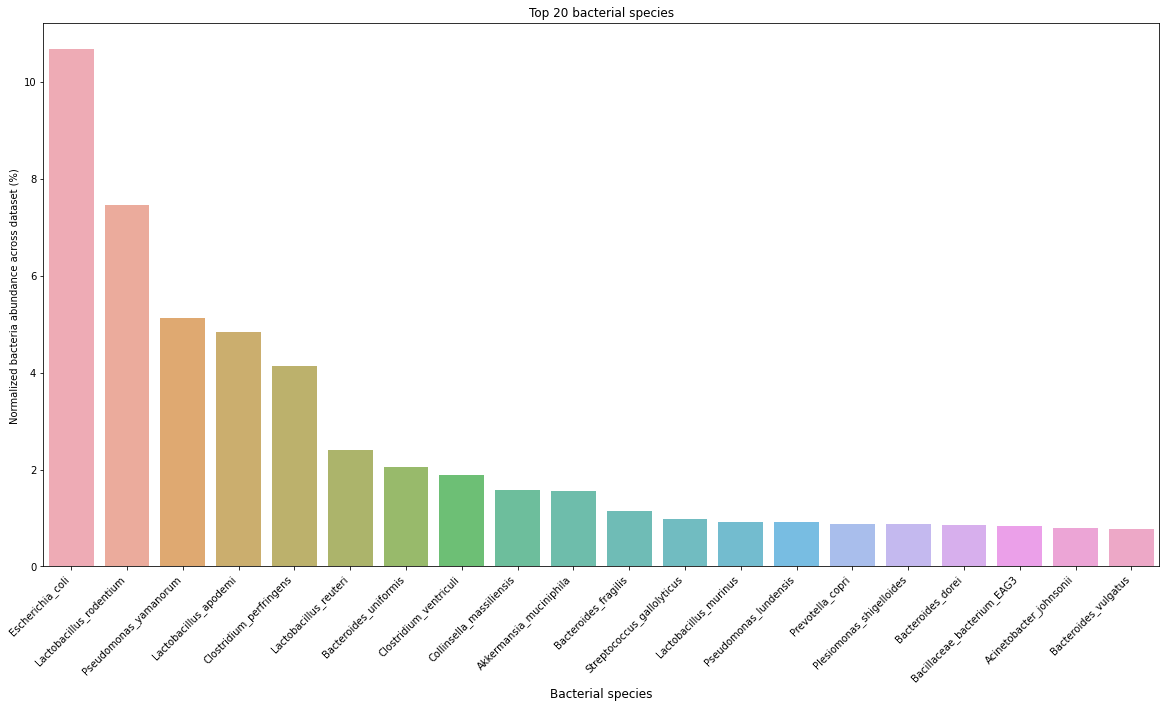

In [14]:
## Use abundance information to plot bacteria abundance by both metrics
normalized_abundance = df_bacteria_abundance['normalized_abundance_over_dataset'].copy()
normalized_abundance.sort_values(ascending=False,inplace=True)
normalized_abundance = normalized_abundance[:20,]
plt.figure(figsize=(20,10))
p1=sns.barplot(x=normalized_abundance.index, y=normalized_abundance.values, alpha=0.8)
plt.title('Top 20 bacterial species')
plt.ylabel("Normalized bacteria abundance across dataset (%) ") # \n (Assuming equal similar sample across all samples)
p1.set_xticklabels(p1.get_xticklabels(),rotation=45,horizontalalignment="right")
plt.xlabel("Bacterial species", fontsize=12) 

## Plot abundance by sample presence 

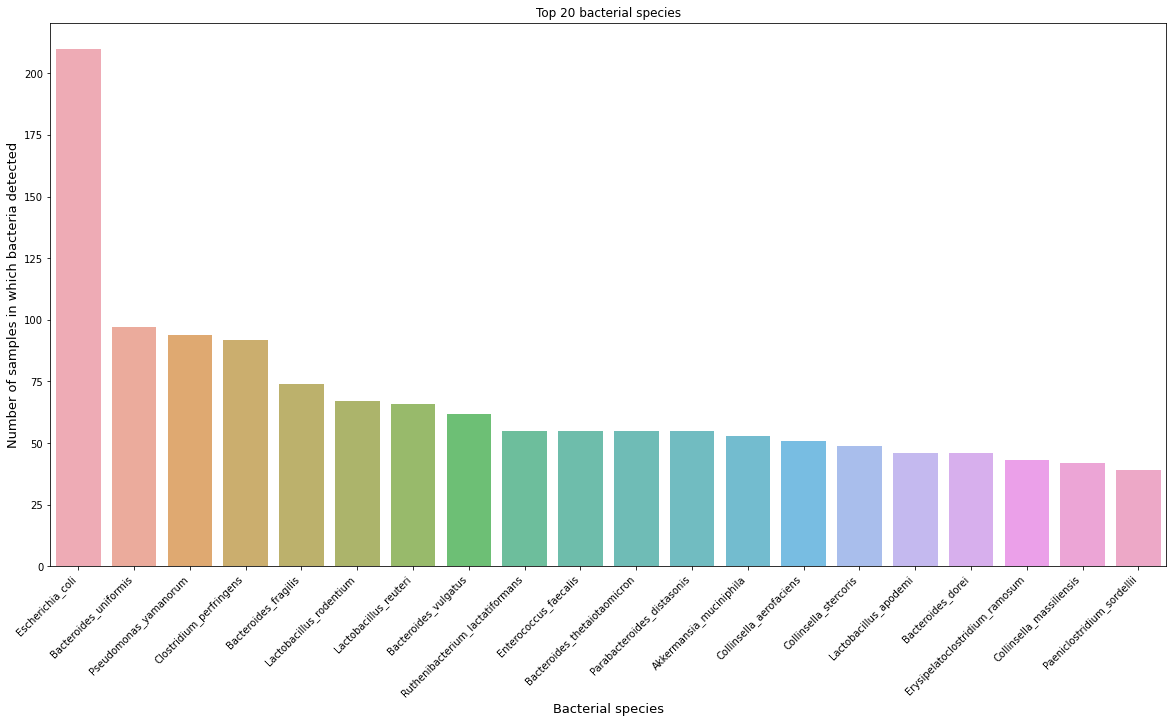

In [15]:
## Use abundance information to plot bacteria abundance by both metrics
normalized_abundance = df_bacteria_abundance['abundance_by_sample_count'].copy()
normalized_abundance.sort_values(ascending=False,inplace=True)
normalized_abundance = normalized_abundance[:20,]
plt.figure(figsize=(20,10))
p2=sns.barplot(x=normalized_abundance.index, y=normalized_abundance.values, alpha=0.8)
plt.title('Top 20 bacterial species')
plt.ylabel("Number of samples in which bacteria detected", fontsize=13) # \n (Assuming equal similar sample across all samples)
p2.set_xticklabels(p2.get_xticklabels(),rotation=45,horizontalalignment="right")
plt.xlabel("Bacterial species", fontsize=13)
plt.show()

## Plot previous two plots together under same figure

In [16]:
## Create the two df for the previous two graphds 
normalized_abundance = df_bacteria_abundance['normalized_abundance_over_dataset'].copy()
normalized_abundance.sort_values(ascending=False,inplace=True)
normalized_abundance = normalized_abundance[:20,]
# normalized_abundance = df_bacteria_abundance['normalized_abundance_over_dataset'].copy().sort_values(ascending=False,inplace=True)
# normalized_abundance_unweighted = df_bacteria_abundance['abundance_by_sample_count'].copy().sort_values(ascending=False,inplace=True)
# normalized_abundance = normalized_abundance[:20,]
# normalized_abundance_unweighted = normalized_abundance[:20,]
normalized_abundance_unweighted = df_bacteria_abundance['abundance_by_sample_count'].copy()
normalized_abundance_unweighted.sort_values(ascending=False,inplace=True)
normalized_abundance_unweighted = normalized_abundance_unweighted[:20,]

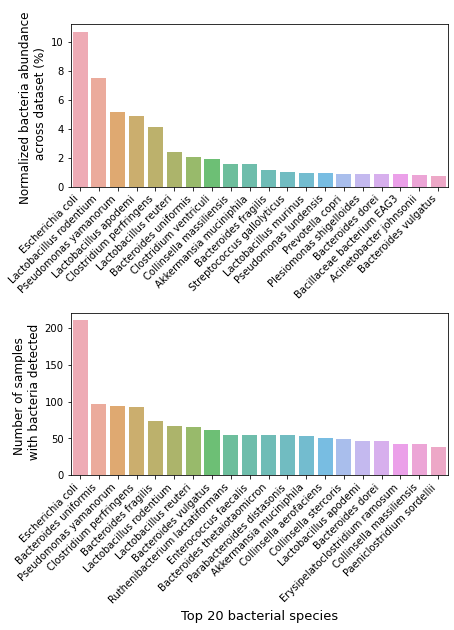

In [39]:
## Plot df
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6.2,8.4), constrained_layout=True) ## constrained_layout helped space everything out! 
ax1.set_ylabel("Normalized bacteria abundance \n across dataset (%)",fontsize=12) 
ax1.xaxis.label.set_visible(False)
sns.barplot(x=normalized_abundance.index, y=normalized_abundance.values, alpha=0.8, ax=ax1)
lab1=[x.get_text().replace("_"," ") for x in ax1.get_xticklabels()]
ax1.set_xticklabels(lab1,rotation=45,horizontalalignment="right",fontsize=10)

ax2.set_ylabel("Number of samples \n with bacteria detected",fontsize=12) 
sns.barplot(x=normalized_abundance_unweighted.index, y=normalized_abundance_unweighted.values, alpha=0.8, ax=ax2)
lab2=[x.get_text().replace("_"," ") for x in ax2.get_xticklabels()]
ax2.set_xticklabels(lab2,rotation=45,horizontalalignment="right",fontsize=10)
ax2.set_xlabel("Top 20 bacterial species", fontsize=13) 

plt.savefig(output_fig_dir+"top20_bacteria_species_profiled_by_metaphlan3.png",dpi=900, bbox_inches="tight")
fig.show()

## Warning color does not match the bacterial species but to the order of abundance! 

# Finding optimal StrainPhlAn run settings 
## Objective: Figure out the best value to run strainphlan as measured by minimun marker per sample. We are maximizing the number of nucleotide able to be compared in a MSA based on the minimun number of recommended markers per sample and 80% theshold for keeping a sample. 

In [23]:
## Set the pkl directory you want to investigate
# pkl_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/consensus_markers_nonMammallianHost/*.pkl"
# pkl_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/consensus_markers_mammallianHost/*.pkl"
pkl_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/consensus_markers/*.pkl"

In [24]:
## Set up for calculation
## 2 things to build 
## 1. The length of each markers for each bacteria
## 2. Build a panda dataframe contain information for each bacteria interested 
##   rows: will be the unique markers for each bacteria
##   columns: will be the samples 
master_dict={} ## first key should be species whose value is a dictionary which keys are the markers and value 
               ## is a dictionary whose keys are the samples whose values is the number of times that marker appeared in the 
               ## sample 
marker_len_dict={}
for species in species_list: 
    # Extract all the header ids or markers for each bacteria 
    header_set=set(())
    marker_dict={}
    for record in SeqIO.parse(clade_dir + "/" + species, "fasta"):
        header_set.add(record.id)
        marker_len_dict.update({record.id:len(record.seq)})
        marker_dict.update({record.id:0})
 
    ## Loop through files and check if the markers are present in the markers for that bacteria  
    sample_dict={}
    for filename in glob.iglob(pkl_dir):            
        infile=open(filename,'rb')
        marker_list=pk.load(infile) ## The dictionary in the file 
        ## count the number of times that marker appeared 
        for marker_info in marker_list: ## Loop through each marker informatio
            if marker_info['marker'] in header_set: ## If the marker id in that marker key associated value is present in our set then increment our dict by 1
                marker_dict[marker_info['marker']]+=1
        filename=os.path.basename(filename)
        sample_dict.update({filename:marker_dict}) ## Add the key (file name) and the marker_dict to our sample dict
        infile.close()
        marker_dict=marker_dict.fromkeys(marker_dict,0)## reset the marker_dict to have 0 values again

        
    master_dict.update({species:sample_dict})

### Set the marker_in_n_sample threshold

In [25]:
## Investigate the dict if wanted
#master_dict["s__Bacteroides_uniformis.fna"]
## Set the marker_in_n_sample threshold
marker_in_n_samples=0.80

In [26]:
## Create function that finds that find the number of marker and subsequently nucleotide that is shared across 
## all the samples in a dataframe
def calculate_marker_score(df, length_for_markers, marker_threshold):

    ## Subset the dataframe to only include markers present in all of the sample 
    ## The value  in this case represents the threshold we are willing to keep a marker
    df=df.loc[:, df.sum()>=marker_threshold*len(df)]
    
    ## replace 1 in dataframe with corresponding read length stored in the marker_len_dict
    ## the loop structure is critical in not making a copy ==> iteritems() help with changing the dataframe directly
    for (columnName, columnData) in df.iteritems():
        columnData=np.where((columnData == 1), length_for_markers[columnName], columnData)
    ## Other ways to change values in column 
#         m = df.column == 1
#         df.where(~m, other=length_for_markers[column])
        #df[column].replace(1, length_for_markers[column],inplace=True) ## This shoot an warning but checked for validity and it's doing what I want it to do
#         df.loc[(df.columnName==1,column)]=marker_len_dict[column]
        
    return df.sum().sum(), len(df) 

def find_best_marker_score(df, length_for_markers, min_marker_per_sample, marker_threshold):
    
    ## Convert the df back to 0 & 1 
    df[df != 0] = 1

    ## Set up variable before for loop
    #len(df) ## number of rows of dataframe represents # of samples present in our dataframe
    score=-1
    best_marker_count=-1
    sample_count=-1
    series_marker_sum=df.sum(axis=1).sort_values()
    ## If somehow the max value is NaN then return negative values of -1
    if math.isnan(series_marker_sum.max()):
        return 0, 0, score 
    else:
        for marker_count in range(min_marker_per_sample, int(series_marker_sum.max())):
            ## update the df by taking away samples that do not have the marker_count
            df=df[df.sum(axis=1)>=marker_count] 

            ## Run the function to find the corresponding score
            tmpScore, num_of_sample=calculate_marker_score(df, length_for_markers, marker_threshold)

            ## Only update score and marker_count if we have tmpScore higher than score! 
            if( tmpScore > score):
                score = tmpScore
                best_marker_count=marker_count
                sample_count = num_of_sample
    
    return best_marker_count, sample_count, score 
    
def unpack_dict_make_df(bacteria_marker_dict, length_for_markers):
    dict_return={}
    for bacteria in bacteria_marker_dict:
        df_bac=pd.DataFrame.from_dict(bacteria_marker_dict[bacteria],orient='index')
        marker_count, sample_count, score = find_best_marker_score(df_bac, length_for_markers, 5, marker_in_n_samples)
        
        tmp_dict={"marker_count":marker_count, "sample_count": sample_count, "score": score}
        dict_return.update({bacteria:tmp_dict})
    
    return dict_return

In [27]:
## Save the IMPORTANT information about best value count in a variable 
dict_strainphlan_optim=unpack_dict_make_df(master_dict, marker_len_dict)
#dict_strainphlan_optim

In [28]:
## Set directory to which to save the optimal settings to 
param_dir='/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/strain-trees-output'

In [93]:
array_bacteria_parameter =  np.empty((0,4))
## This is a place for quick testing of function written above
for bacteria in master_dict:
    df_bac=pd.DataFrame.from_dict(master_dict[bacteria],orient='index')
    count, sampNum, best_score=find_best_marker_score(df_bac,marker_len_dict, 5, marker_in_n_samples)
    print("For "+ str(bacteria.strip("s__").strip(".fna") +":"))
    print("Best count is: " + str(count)+ " -- " + "Number of samples involved: " + str(sampNum) + " -- " + "Best score is: " + str(best_score))
    
    if sampNum >=15: 
        row_to_add = np.array([bacteria, count, sampNum, best_score])
        array_bacteria_parameter = np.vstack((array_bacteria_parameter, row_to_add))

For Acinetobacter_johnsonii:
Best count is: 41 -- Number of samples involved: 5 -- Best score is: 251
For Akkermansia_muciniphil:
Best count is: 45 -- Number of samples involved: 15 -- Best score is: 1310
For Alistipes_shahii:
Best count is: 34 -- Number of samples involved: 5 -- Best score is: 122
For Bacillaceae_bacterium_EAG3:
Best count is: 0 -- Number of samples involved: 0 -- Best score is: -1
For Bacteroides_dorei:
Best count is: 57 -- Number of samples involved: 16 -- Best score is: 1382
For Bacteroides_fragilis:
Best count is: 63 -- Number of samples involved: 16 -- Best score is: 1838
For Bacteroides_thetaiotaomicro:
Best count is: 93 -- Number of samples involved: 10 -- Best score is: 975
For Bacteroides_uniformis:
Best count is: 82 -- Number of samples involved: 25 -- Best score is: 2414
For Bacteroides_vulgatus:
Best count is: 29 -- Number of samples involved: 17 -- Best score is: 489
For Clostridium_perfringens:
Best count is: 91 -- Number of samples involved: 30 -- Best 

In [94]:
df_bacteria_param =pd.DataFrame( array_bacteria_parameter, columns = ['bacteria', 'marker_threshold',"number_of_samples","best_alignment_score"])
output_file_path = join(param_dir,"optimal_marker_per_sample_setting_for_"+str(int(marker_in_n_samples*100))+"%_marker_threshold.csv")
df_bacteria_param.to_csv(output_file_path, index=False)
df_bacteria_param

,bacteria,marker_threshold,number_of_samples,best_alignment_score
0,s__Akkermansia_muciniphila.fna,45,15,1310
1,s__Bacteroides_dorei.fna,57,16,1382
2,s__Bacteroides_fragilis.fna,63,16,1838
3,s__Bacteroides_uniformis.fna,82,25,2414
4,s__Bacteroides_vulgatus.fna,29,17,489
5,s__Clostridium_perfringens.fna,91,30,3937
6,s__Escherichia_coli.fna,14,71,1615
7,s__Lactobacillus_rodentium.fna,41,16,669
8,s__Parabacteroides_distasonis.fna,50,15,840
9,s__Prevotella_copri.fna,43,15,1598


# Visualize the bacteria by made the cut-off by sample-count , our threshold is 15

In [29]:
# Make the dataframe and take a look 
df_strainphlan_optimun=pd.DataFrame.from_dict(dict_strainphlan_optim)
df_strainphlan_optimun

,s__Acinetobacter_johnsonii.fna,s__Akkermansia_muciniphila.fna,s__Alistipes_shahii.fna,s__Bacillaceae_bacterium_EAG3.fna,s__Bacteroides_dorei.fna,s__Bacteroides_fragilis.fna,s__Bacteroides_thetaiotaomicron.fna,s__Bacteroides_uniformis.fna,s__Bacteroides_vulgatus.fna,s__Clostridium_perfringens.fna,...,s__Lactobacillus_murinus.fna,s__Lactobacillus_reuteri.fna,s__Lactobacillus_rodentium.fna,s__Parabacteroides_distasonis.fna,s__Plesiomonas_shigelloides.fna,s__Prevotella_copri.fna,s__Pseudomonas_lundensis.fna,s__Pseudomonas_yamanorum.fna,s__Ruthenibacterium_lactatiformans.fna,s__Streptococcus_gallolyticus.fna
marker_count,41,45,34,0,57,63,93,82,29,91,...,18,34,41,50,0,43,0,41,84,29
sample_count,5,15,5,0,16,16,10,25,17,30,...,5,6,16,15,0,15,0,10,5,5
score,251,1310,122,-1,1382,1838,975,2414,489,3937,...,192,260,669,840,-1,1598,-1,548,510,125


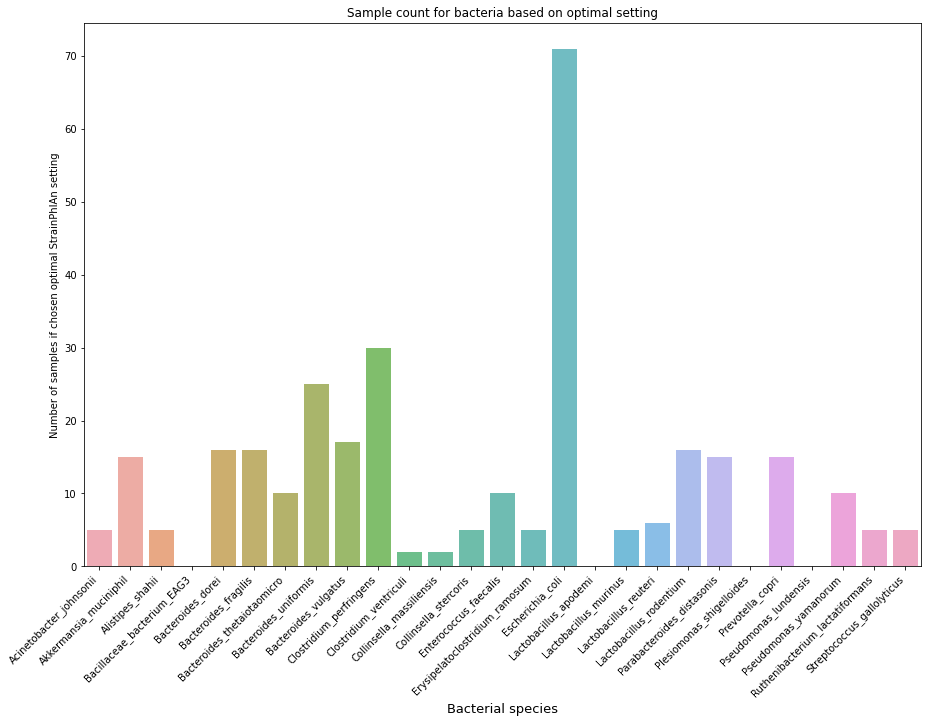

In [30]:
## Plot the row of the dataframe we are interested in and put line across 
bac_sample_count = df_strainphlan_optimun.loc['sample_count',:]
plt.figure(figsize=(15,10))
p3=sns.barplot(x=bac_sample_count.index, y=bac_sample_count.values, alpha=0.8)
plt.title('Sample count for bacteria based on optimal setting')
plt.ylabel("Number of samples if chosen optimal StrainPhlAn setting") # \n (Assuming equal similar sample across all samples)
labels = [bac.get_text() for bac in p3.get_xticklabels()]
newlabels= [text.strip("s__").strip(".fna") for text in labels]
p3.set_xticklabels( newlabels,rotation=45,horizontalalignment="right")
plt.xlabel("Bacterial species", fontsize=13)
plt.show()

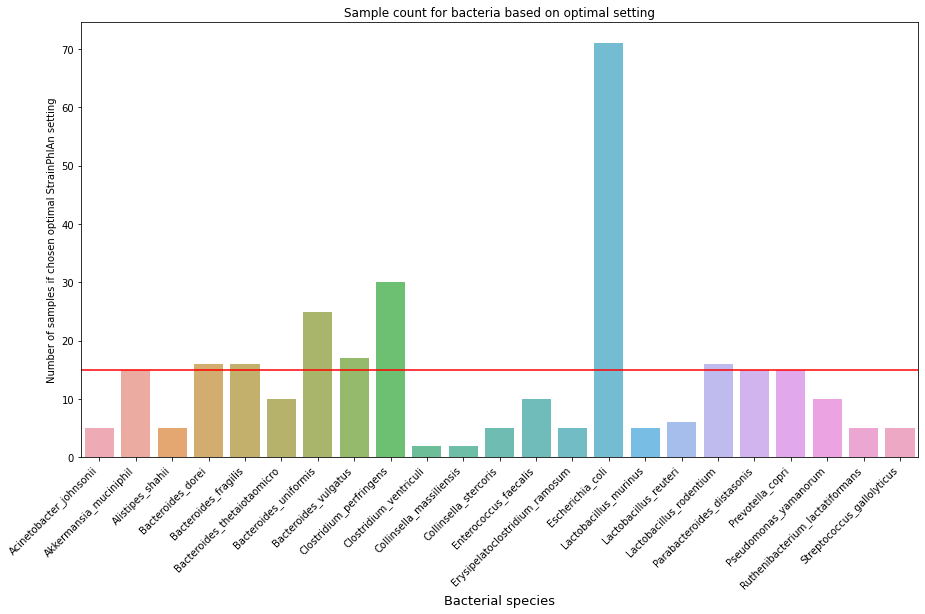

In [31]:
## Replot but with bacteria with 0 samples removed 
bac_sample_count_subset= bac_sample_count.loc[bac_sample_count != 0]
bac_sample_count_subset

plt.figure(figsize=(15,8))
p3=sns.barplot(x=bac_sample_count_subset.index, y=bac_sample_count_subset.values, alpha=0.8)
plt.title('Sample count for bacteria based on optimal setting')
plt.ylabel("Number of samples if chosen optimal StrainPhlAn setting") # \n (Assuming equal similar sample across all samples)
labels = [bac.get_text() for bac in p3.get_xticklabels()]
newlabels= [text.strip("s__").strip(".fna") for text in labels]
p3.set_xticklabels( newlabels,rotation=45,horizontalalignment="right")
plt.xlabel("Bacterial species", fontsize=13)
p3.axhline(15, color="red") ## draw horizontal line across

plt.show()

# Visualize marker density with minimun marker information

## Build dict that can help visualize markers count avaiable for each sample for each bacterial species

In [32]:
master_count_dict={}
for species in species_list: 
    # Extract the header ids 
    header_set=set(())
    for record in SeqIO.parse(clade_dir + "/" + species, "fasta"):
        header_set.add(record.id)

    ## Count markers in each sample     
    sample_marker_dict = {}
    ## Loop through files in a dir 
    for filename in glob.iglob(pkl_dir):
        count = 0 
        #print(filename)
        ## Unpickle each file ==> each file is a list of dictionary 
        infile = open(filename,'rb')
        marker_list = pk.load(infile)  
        ## Loop through content of each file and count the # of head that matches content of array while keeping count 
        for marker_info in marker_list:
            if marker_info['marker'] in header_set: 
                count+=1 
        infile.close()
        sample_marker_dict.update({filename:count})

    ## Store count along with file name in 2 dictionary : 1 counting 0 markers one without 
    ## Convert sample_marker_dict to marker_count_sample_dict
    marker_count_sample_dict={0:0}
    marker_count_sample_zoom_dict={}
    for key in sample_marker_dict:
        count_key=sample_marker_dict[key]
        if count_key == 0:
            marker_count_sample_dict[0]+=1
            continue
        else:
            if marker_count_sample_dict.get(count_key) is None: 
                marker_count_sample_dict.update({count_key:1})
                marker_count_sample_zoom_dict.update({count_key:1})
            else: 
                marker_count_sample_dict[count_key]+=1
                marker_count_sample_zoom_dict[count_key]+=1
    
    ## Update the master_count_dict
    list_marker_count=[marker_count_sample_dict,marker_count_sample_zoom_dict]
    master_count_dict.update({species:list_marker_count})

In [33]:
## Investigate master_count_dict
# master_count_dict

## Plot one graph that considers samples without any associated markers

s__Acinetobacter_johnsonii.fna
s__Akkermansia_muciniphila.fna
s__Alistipes_shahii.fna
s__Bacillaceae_bacterium_EAG3.fna
s__Bacteroides_dorei.fna
s__Bacteroides_fragilis.fna
s__Bacteroides_thetaiotaomicron.fna
s__Bacteroides_uniformis.fna
s__Bacteroides_vulgatus.fna
s__Clostridium_perfringens.fna
s__Clostridium_ventriculi.fna
s__Collinsella_massiliensis.fna
s__Collinsella_stercoris.fna
s__Enterococcus_faecalis.fna
s__Erysipelatoclostridium_ramosum.fna
s__Escherichia_coli.fna
s__Lactobacillus_apodemi.fna
s__Lactobacillus_murinus.fna
s__Lactobacillus_reuteri.fna
s__Lactobacillus_rodentium.fna
s__Parabacteroides_distasonis.fna
s__Plesiomonas_shigelloides.fna
s__Prevotella_copri.fna
s__Pseudomonas_lundensis.fna
s__Pseudomonas_yamanorum.fna
s__Ruthenibacterium_lactatiformans.fna
s__Streptococcus_gallolyticus.fna


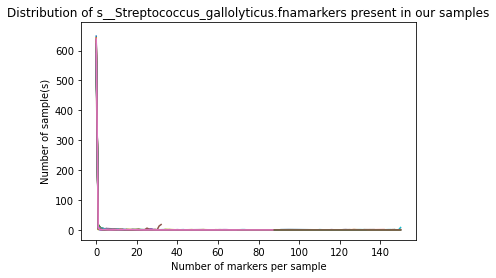

In [32]:
for bacteria in master_count_dict: 
    print(bacteria)
    lists = sorted(master_count_dict[bacteria][0].items()) # sorted by key, return a list of tuples

    x, y = zip(*lists)

    plt.plot(x, y)
    plt.title("Distribution of " + bacteria + "markers present in our samples")
    plt.xlabel('Number of markers per sample') 
    plt.ylabel('Number of sample(s)') 


plt.show()


## Plot one graph that does not considers samples without any associated markers

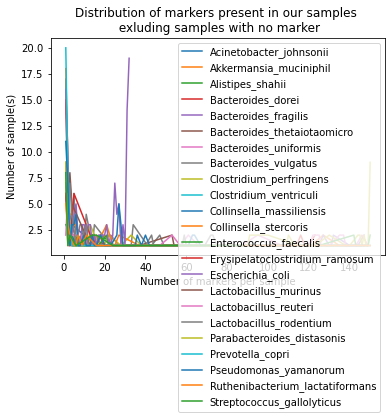

In [33]:
for bacteria in master_count_dict: 
    # Continue if some bacteria does not have any markers that passed the theshold
    if len(master_count_dict[bacteria][1].items()) == 0: 
        continue
    lists = sorted(master_count_dict[bacteria][1].items()) # sorted by key, return a list of tuples
    x, y = zip(*lists)

    plt.plot(x, y, label=bacteria.strip("s__").strip(".fna") )
    plt.title("Distribution of markers present in our samples \n exluding samples with no marker")
    plt.xlabel('Number of markers per sample') 
    plt.ylabel('Number of sample(s)') 
    
plt.legend()
plt.show()

## Reconfigure the dictionary to another dictionary that can be converted into a panda df for easy visualization

In [34]:
master_count_dict

{'s__Acinetobacter_johnsonii.fna': [{0: 629,
   1: 17,
   40: 1,
   4: 3,
   74: 1,
   65: 1,
   17: 1,
   2: 2,
   33: 1,
   16: 1,
   42: 1,
   72: 1,
   43: 1,
   32: 1},
  {1: 17,
   40: 1,
   4: 3,
   74: 1,
   65: 1,
   17: 1,
   2: 2,
   33: 1,
   16: 1,
   42: 1,
   72: 1,
   43: 1,
   32: 1}],
 's__Akkermansia_muciniphila.fna': [{0: 624,
   135: 1,
   60: 1,
   20: 2,
   94: 1,
   116: 1,
   118: 1,
   127: 2,
   138: 1,
   3: 2,
   1: 7,
   16: 2,
   139: 1,
   121: 1,
   4: 1,
   6: 1,
   26: 1,
   24: 1,
   77: 1,
   73: 1,
   7: 1,
   9: 1,
   112: 1,
   15: 1,
   87: 1,
   44: 1,
   104: 1,
   18: 1},
  {135: 1,
   60: 1,
   20: 2,
   94: 1,
   116: 1,
   118: 1,
   127: 2,
   138: 1,
   3: 2,
   1: 7,
   16: 2,
   139: 1,
   121: 1,
   4: 1,
   6: 1,
   26: 1,
   24: 1,
   77: 1,
   73: 1,
   7: 1,
   9: 1,
   112: 1,
   15: 1,
   87: 1,
   44: 1,
   104: 1,
   18: 1}],
 's__Alistipes_shahii.fna': [{0: 629,
   3: 2,
   4: 2,
   10: 1,
   13: 2,
   18: 2,
   1: 6,
   2: 5

In [34]:
## Loop for master dict and build appropriate dictionary ==> One one considering samples with 0 markers
data = {'Bacteria species': [], 'Number of markers': []}
for bacteria in master_count_dict: 
    count_of_markers=master_count_dict[bacteria][1]
    for number_of_marker_per_sample in count_of_markers:
        for i in range(count_of_markers[number_of_marker_per_sample]):
            data['Bacteria species'].append(bacteria.strip('s__').strip('.fna'))
            data['Number of markers'].append(number_of_marker_per_sample)

df_bacteria_markers=pd.DataFrame.from_dict(data)

## Loop for master dict and build appropriate dictionary ==> build one without considering samples with 0 markers 
data2 = {'Bacteria species': [], 'Number of markers': []}
for bacteria in master_count_dict: 
    count_of_markers=master_count_dict[bacteria][0]
    for number_of_marker_per_sample in count_of_markers:
        for i in range(count_of_markers[number_of_marker_per_sample]):
            data2['Bacteria species'].append(bacteria.strip('s__').strip('.fna'))
            data2['Number of markers'].append(number_of_marker_per_sample)

df_bacteria_markers_samples0=pd.DataFrame.from_dict(data2)

In [36]:
df_bacteria_markers.head()
df_bacteria_markers_samples0.head()

,Bacteria species,Number of markers
0,Acinetobacter_johnsonii,0
1,Acinetobacter_johnsonii,0
2,Acinetobacter_johnsonii,0
3,Acinetobacter_johnsonii,0
4,Acinetobacter_johnsonii,0


## Plot the marker distribution for each bacteria

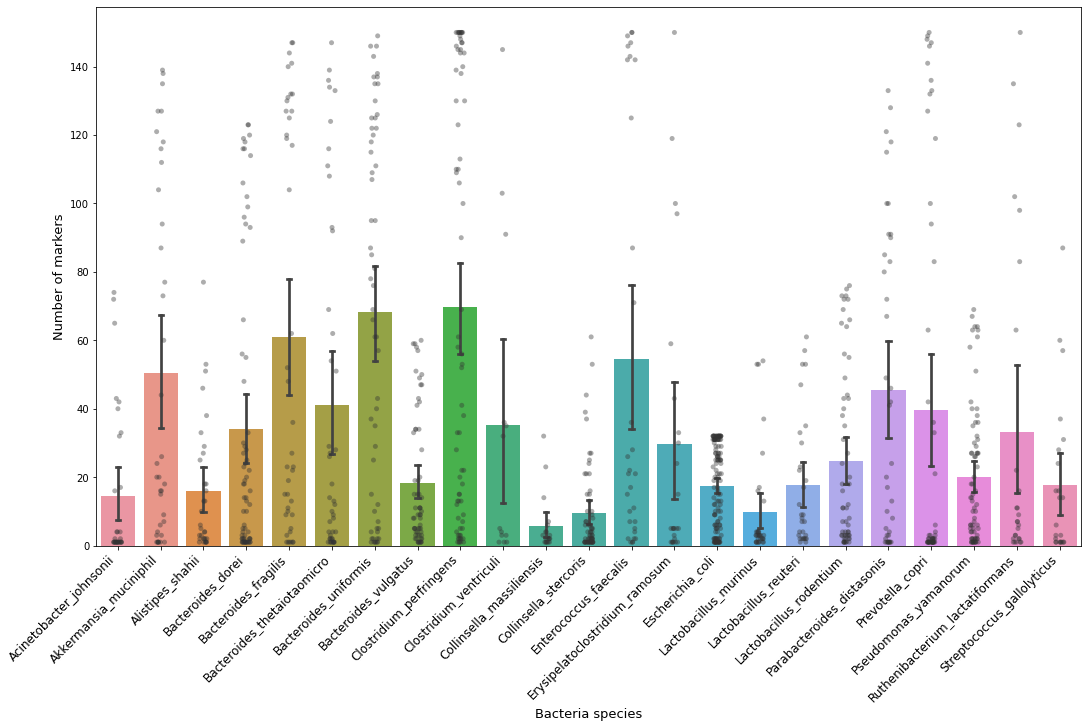

In [37]:
plt.subplots(figsize=(15,10), constrained_layout=True) 
p=sns.barplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, capsize=.1)
p.set_xlabel("Bacterial species", fontsize=13)
p.set_ylabel("Number of markers", fontsize=13)
p.set_xticklabels(p.get_xticklabels(),rotation=45,horizontalalignment="right",fontsize=12)
p=sns.stripplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, color="0.2", alpha=.4)

plt.show()

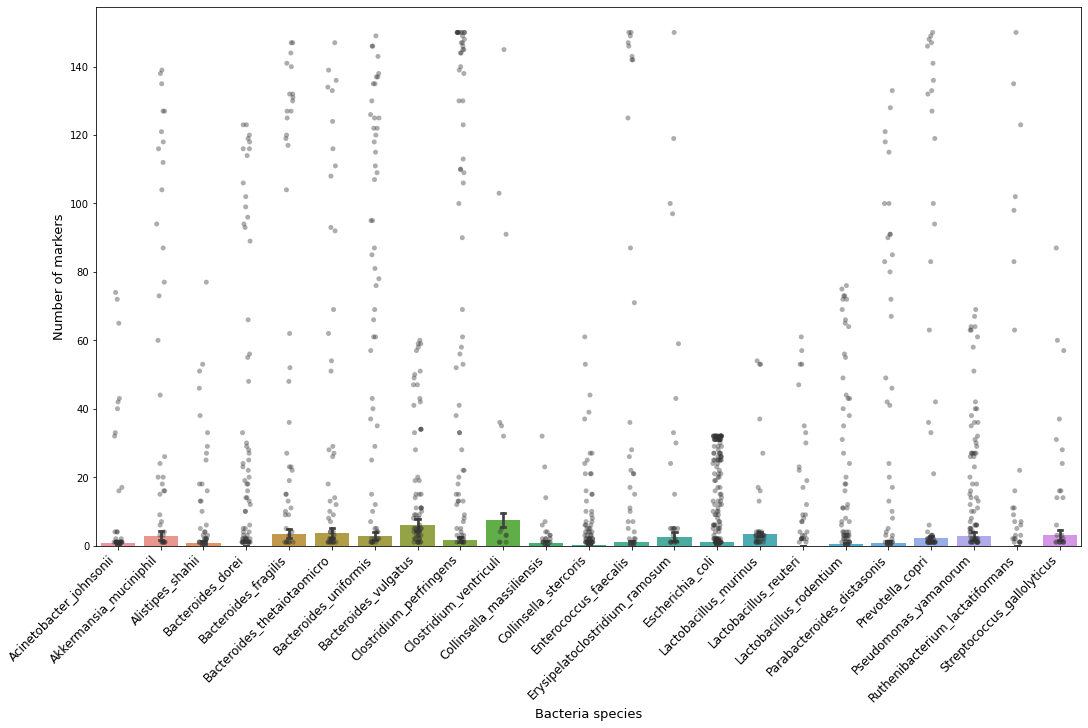

In [38]:
plt.subplots(figsize=(15,10), constrained_layout=True) 
p=sns.barplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers_samples0, capsize=.1)
p.set_xlabel("Bacterial species", fontsize=13)
p.set_ylabel("Number of markers", fontsize=13)
p.set_xticklabels(p.get_xticklabels(),rotation=45,horizontalalignment="right",fontsize=12)
p=sns.stripplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, color="0.2", alpha=.4)

plt.show()

## Add to the dataframe information about if particular sample is above the desired minimun marker per sample requirement 

In [37]:
## Strategy is 2 fold
## 1. create a new column 
## 2. Replace values in that directory 
df_bacteria_markers["StrainPhlAn pipeline eligibility"] = 0
    
for bacteria in dict_strainphlan_optim:
    bacteria_trimmed=bacteria.strip("s__").strip(".fna")
    
    ## Probably the hardest line of code in the notebook! 
    df_bacteria_markers.loc[df_bacteria_markers["Bacteria species"] == bacteria_trimmed, "StrainPhlAn pipeline eligibility"] = np.where(df_bacteria_markers.loc[df_bacteria_markers["Bacteria species"] == bacteria_trimmed,"Number of markers"] >= dict_strainphlan_optim[bacteria]["marker_count"], "Included", "Excluded")


In [38]:
## Examine new df and the marker dict use to change it 
print(dict_strainphlan_optim)
print(df_bacteria_markers.tail())

{'s__Acinetobacter_johnsonii.fna': {'marker_count': 41, 'sample_count': 5, 'score': 251}, 's__Akkermansia_muciniphila.fna': {'marker_count': 45, 'sample_count': 15, 'score': 1310}, 's__Alistipes_shahii.fna': {'marker_count': 34, 'sample_count': 5, 'score': 122}, 's__Bacillaceae_bacterium_EAG3.fna': {'marker_count': 0, 'sample_count': 0, 'score': -1}, 's__Bacteroides_dorei.fna': {'marker_count': 57, 'sample_count': 16, 'score': 1382}, 's__Bacteroides_fragilis.fna': {'marker_count': 63, 'sample_count': 16, 'score': 1838}, 's__Bacteroides_thetaiotaomicron.fna': {'marker_count': 93, 'sample_count': 10, 'score': 975}, 's__Bacteroides_uniformis.fna': {'marker_count': 82, 'sample_count': 25, 'score': 2414}, 's__Bacteroides_vulgatus.fna': {'marker_count': 29, 'sample_count': 17, 'score': 489}, 's__Clostridium_perfringens.fna': {'marker_count': 91, 'sample_count': 30, 'score': 3937}, 's__Clostridium_ventriculi.fna': {'marker_count': 92, 'sample_count': 2, 'score': 196}, 's__Collinsella_massilie

## Plot the swarm plot but colored differently 

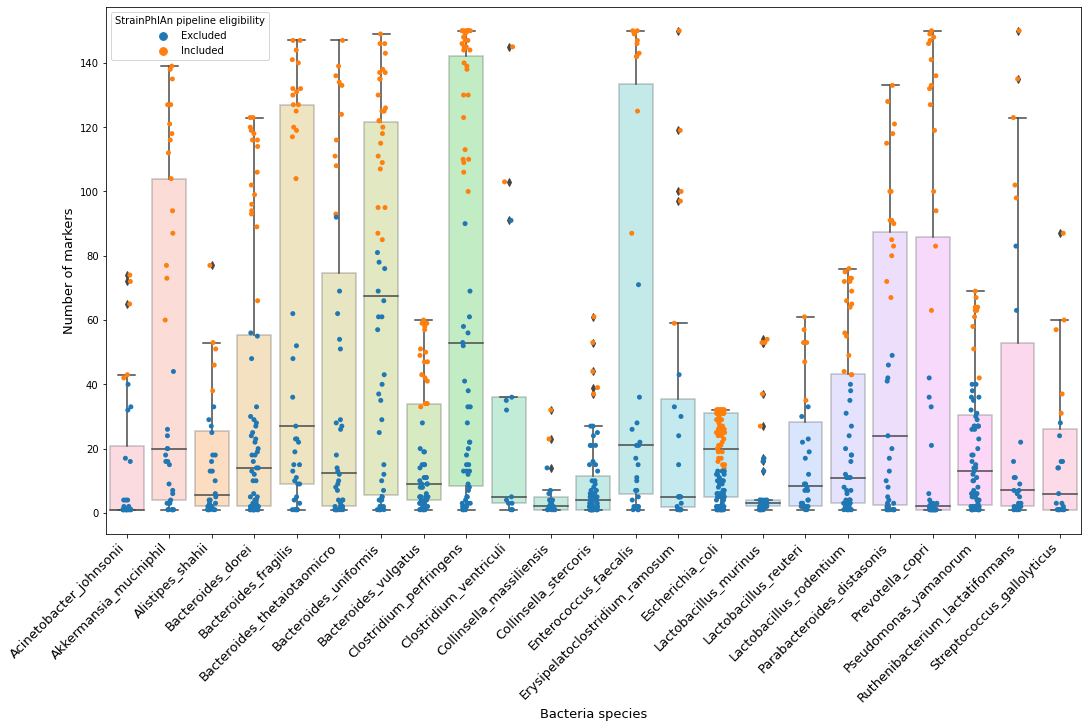

In [39]:
## Only change the color hue 
plt.subplots(figsize=(15,10), constrained_layout=True) 
# p=sns.barplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, capsize=.1)
p=sns.boxplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, saturation=1, boxprops=dict(alpha=.3))
p.set_xticklabels(p.get_xticklabels(),fontsize=13,rotation=45, horizontalalignment="right")
p.set_xlabel("Bacterial species", fontsize=13)
p.set_ylabel("Number of markers", fontsize=13)
p=sns.stripplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, hue="StrainPhlAn pipeline eligibility", alpha=1)

plt.show()

## Plot the above plot along with the plot with measures the amount of samples eligible for investigation for each bacteria

['Acinetobacter johnsonii', 'Akkermansia muciniphila', 'Alistipes shahii', 'Bacteroides dorei', 'Bacteroides fragilis', 'Bacteroides thetaiotaomicron', 'Bacteroides uniformis', 'Bacteroides vulgatus', 'Clostridium perfringens', 'Clostridium ventriculi', 'Collinsella massiliensis', 'Collinsella stercoris', 'Enterococcus faecalis', 'Erysipelatoclostridium ramosum', 'Escherichia coli', 'Lactobacillus murinus', 'Lactobacillus reuteri', 'Lactobacillus rodentium', 'Parabacteroides distasonis', 'Prevotella copri', 'Pseudomonas yamanorum', 'Ruthenibacterium lactatiformans', 'Streptococcus gallolyticus']


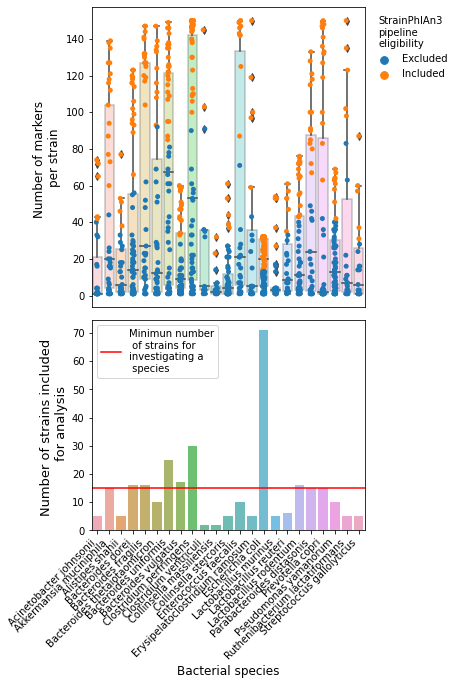

In [48]:


# fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15), constrained_layout=True) ## constrained_layout helped space everything out! 
# ax1.set_ylabel("Normalized bacteria abundance across dataset (%)",fontsize=13) 
# ax1.xaxis.label.set_visible(False)
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,horizontalalignment="right",fontsize=12)
# sns.barplot(x=normalized_abundance.index, y=normalized_abundance.values, alpha=0.8, ax=ax1)
# ax2.set_ylabel("Number of samples in which bacteria detected",fontsize=13) 
# ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,horizontalalignment="right",fontsize=12)
# sns.barplot(x=normalized_abundance_unweighted.index, y=normalized_abundance_unweighted.values, alpha=0.8, ax=ax2)
# ax2.set_xlabel("Bacterial species", fontsize=13) 

# fig.suptitle("Top 20 bacterial species", fontsize=13)
# fig.show()

fig, (p4, p5) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[2,1.4]}, figsize=(6.25,9.4),constrained_layout=True)

sns.barplot(x=bac_sample_count_subset.index, y=bac_sample_count_subset.values, alpha=0.8, ax=p5)
p5.set_ylabel("Number of strains included \n for analysis", fontsize=13) # \n (Assuming equal similar sample across all samples)
p5.set_xlabel("Bacterial species", fontsize=12)
p5.axhline(15, color="red", label="Minimun number\n of strains for \ninvestigating a \n species") ## draw horizontal line across
#p4.legend(fontsize=8)
## How to plot legend outside of the box 
handles, labels = p5.get_legend_handles_labels()
p5.legend(handles[0:2],labels[0:2], loc=2)
labels = [bac.get_text() for bac in p5.get_xticklabels()]
newlabels= [text.replace("s__","") for text in labels]
newlabels= [text.replace(".fna","") for text in newlabels]
newlabels= [text.replace("_"," ") for text in newlabels]
print(newlabels)
p5.set_xticklabels(newlabels,fontsize=10 ,rotation=45, horizontalalignment="right")
p5.set_xlabel("Bacterial species", fontsize=12)


# p=sns.barplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, capsize=.1)
sns.boxplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, saturation=1, boxprops=dict(alpha=.3),ax=p4)
sns.stripplot(x='Bacteria species', y='Number of markers', data=df_bacteria_markers, hue="StrainPhlAn pipeline eligibility", alpha=1, ax=p4)
p4.set_ylabel("Number of markers \nper strain", fontsize=12)
## How to plot legend outside of the box 
p4.xaxis.label.set_visible(False)
p4.set(xticklabels=[])
p4.tick_params(bottom = False)
handles, labels = p4.get_legend_handles_labels()
p4.legend(handles[0:2],labels[0:2], bbox_to_anchor=(1,1), loc=2, title ="StrainPhlAn3\npipeline\neligibility", frameon=False)

#plt.savefig(output_fig_dir+"bacteria_eligibility_based_on_sampleCount_marker_distribution.png",dpi=900, bbox_inches="tight")
fig.show()


In [ ]:
print(hi)